# Ipywidgets

This file shows an example of using ipywidgets to create sliders and update plots. The example used is a simple pendulum. This code shows the time response of a pendulum when the damping coefficient, b, is varied. 

## Step 1
Import required packages as shown below

In [1]:
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib notebook

The function below generates the system model based on the state space equation derived from equations of motion. 

In [2]:
def statespace(y,t):
    """
    The function is called for creating a state space vector x_dot from the equation x_dot = Ax
    
    y0 = initial condition
    t = time vector
    """
    
    dydt = np.zeros_like(y)
    
    dydt[0]=y[1] # theta_dot = theta_dot
    dydt[1]=-b/M*y[1]-g/L*np.sin(y[0]) #theta_doubleDot = -b/M theta_dot -g/L sin(theta)
    
    return dydt

The function below generates the x and y postion of the pendulum based on the generated statespace vector from the function above.

In [3]:
def positions():
    """
    Function used to integrate the statespace vector and calculate the states solution
    
    inputs :
        dydt = Statespace vector X_dot = AX
    
    Outputs:
        x = pendulum x position
        y = pendulum y position
        
    """
    y_vec = integrate.odeint(statespace, y0, t)  #Sovle the system of ODEs where the function is statespace, initial conditions = y0 and t = time.
    
    x = np.cos(y_vec[:,0])  # Store the value of x position
    y= np.sin(y_vec[:,0])   # Store the valye of y position
    th = y_vec[:,0]         # Store the value of theta
    
    return x,y,th

## Step - 2

Create the function that is called when the slider is changed or updated. The function below is called when the sldier is updated. Based on the requirements of this program, the slider updates the value of *b*, calls the statespace and position functions to update the statespace vector and plots the result.

In [15]:
def update(change): #Requires the "change" parameter to recognize the update function 
    ax.cla()  #Clear the figure for the new plot
    ax.grid() #Draw the grid
    
    global b,M,L,g,y0,t      # Global so that they can be accessed in other functions
    b = change.new           # Assign the new slider value to b
    M = 1    #Mass
    L = 1    #Length of Pendulum
    g = 9.8  #Gravity
    
    T_final = 15
    dt = 0.1
    t = np.arange(0,T_final,dt)

    #Initializing Base Run
    y0 = np.array([np.pi/3,0]) # Initial Pendulum location
    dydt = statespace(y0,t)    # Creating Statespace vector
    x,y,th = positions()       # Store the new postions and angles 
    
    ax.plot(t,th)              # Plot the new graph  
    plt.xlabel("Time (sec)")
    plt.ylabel("Pendulum x-position") 

## Step - 3 

Create slider using the syntax in line 6 below. Line 7 tells connects the function *update* to the slider 

<IPython.core.display.Javascript object>


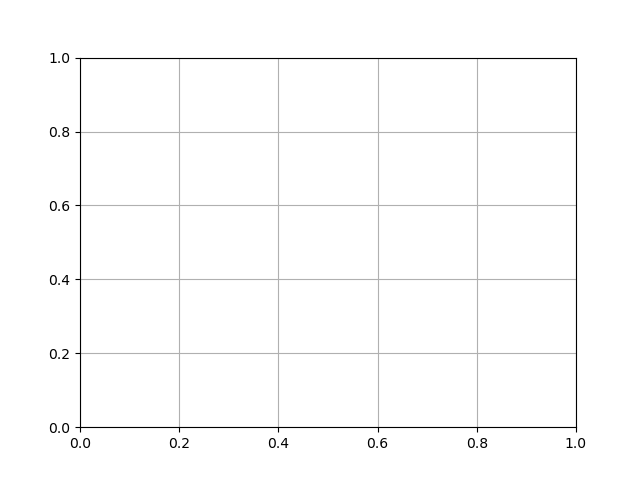

IntSlider(value=1, continuous_update=False, description='$b$', max=10)

In [16]:
fig, ax = plt.subplots()
ax.grid(True)
    
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1,description='$b$',continuous_update=False) # Create slider with parameters
int_slider.observe(update, 'value') # Link the slider to update function
int_slider # Show the slider
